In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.9MB 9.2MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
#tf.logging.set_verbosity(tf.logging.ERROR)


import numpy as np
import math
import matplotlib.pyplot as plt

import tqdm 
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.5.0


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
    

In [5]:
class_names = ['Top/Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [6]:
train_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [7]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
test_image = test_dataset

In [8]:
train_dataset

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

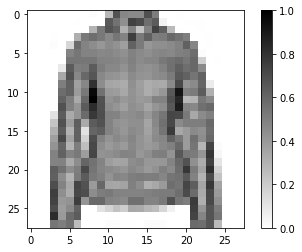

In [10]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

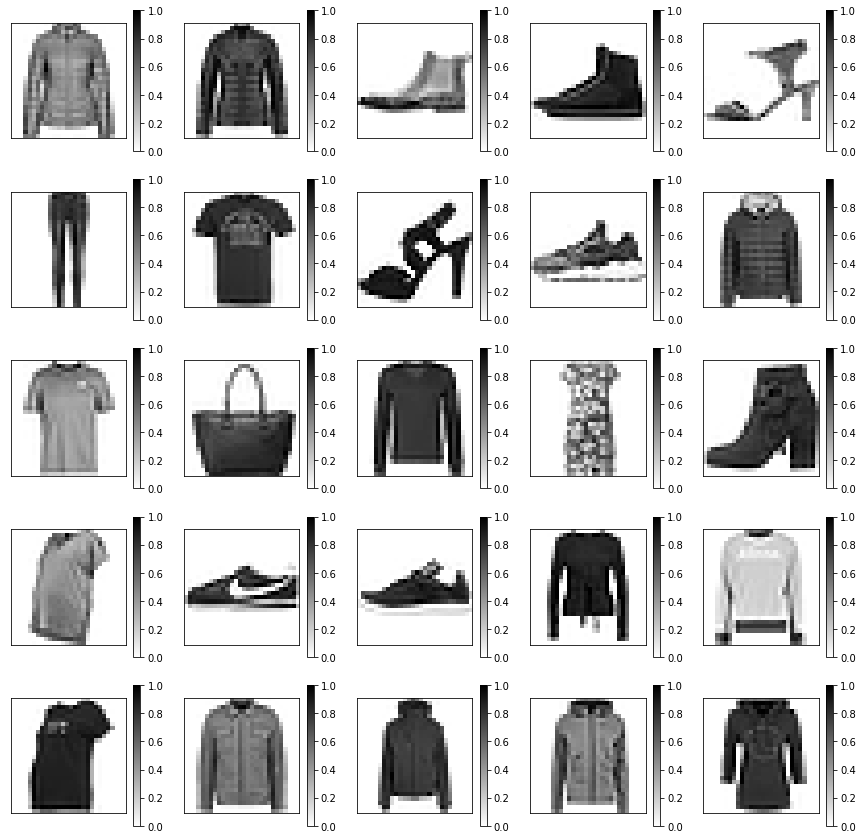

In [11]:
plt.figure(figsize=(15,15))
i=0
for image, label in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  i += 1
plt.show()

In [12]:
#Build Model

In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Softmax Create Probablity Dist
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #For Classification
              metrics=['accuracy'])

In [15]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [16]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.4841 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3604 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3272 - accuracy: 0.8795
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3078 - accuracy: 0.8874
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2864 - accuracy: 0.8927


In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples))
print('Accuracy on Test Data:' , test_accuracy)

  309/10000 [..............................] - ETA: 32s - loss: 0.3577 - accuracy: 0.8741WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10000 batches). You may need to use the repeat() function when building your dataset.


10000/10000 [==============================] - 1s 108us/step - loss: 0.3582 - accuracy: 0.8739
Accuracy on Test Data: 0.8738999962806702


In [18]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [19]:
predictions.shape

(32, 10)

In [20]:
predictions[0]

array([3.3001811e-04, 3.6657946e-06, 4.4964892e-03, 1.8677017e-06,
       9.8190355e-01, 1.0134863e-07, 1.3233032e-02, 4.8750075e-09,
       3.1266292e-05, 4.1983288e-09], dtype=float32)

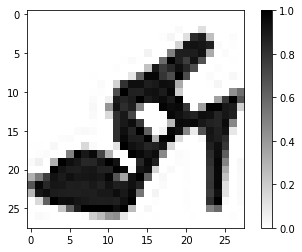

Predicted: Sandal
Actual   : Sandal


In [21]:
x = 7

for image, label in test_image.take(x+1):
  pass

image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print("Predicted: " + class_names[np.argmax(predictions[x])])
print("Actual   : " + class_names[test_labels[x]])